<strong>shaply값에 대한 이해필요 <br>
    기여도..?

In [ ]:
## shap value를 활용하여 변수중요도를 뽑아내기
## target value에 어떤 영향을 미치는지 시각적 확인이 가능  --> Dependence Plot
## 예측에 어떤 요소가 얼마만큰 영향을 미치는지 -> force plot

# 데이터 불러오기

In [4]:
import os
import pandas as pd

os.chdir(r'C:\Users\pc\Documents\data')
data = pd.read_csv("bank-additional-full.csv", sep=';')
## yes, no를 숫자로 변환

data = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

data['id']= range(len(data))

len(data)

input_var=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']


In [5]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## 시각화나 모델 설명에 있어서는 <br>
## 분류모형보다 회귀모형을 설명할 때 더 직관적임

In [6]:
## y를 수치형으로 변형하는 또 다른 방법
import numpy as np
data['y'] = np.where(data['y']=='no',0,1)

## xgboost 학습시키기

In [10]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 300, learning_rate=0.1)

In [13]:
xgb.fit(data[input_var],data['y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 변수중요도

In [ ]:
##install -> ananconda prompt창에서  -conda install -c conda-forge shap

In [14]:
import shap

In [15]:
explainer=shap.TreeExplainer(xgb)  ##클래스개념

In [16]:
shap_values=explainer.shap_values(data[input_var])

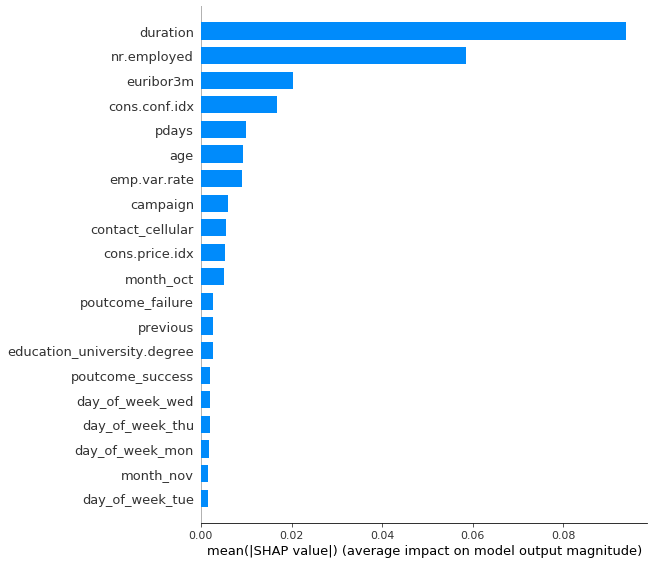

In [17]:
##인자 총 3개 필요 뽑아낸 shap values, input_var, plot_type 
shap.summary_plot(shap_values, data[input_var], plot_type='bar')

In [ ]:
## duration, nr.employed, euribor3m 이 3개가 big 3인것으로

## Dependence plot

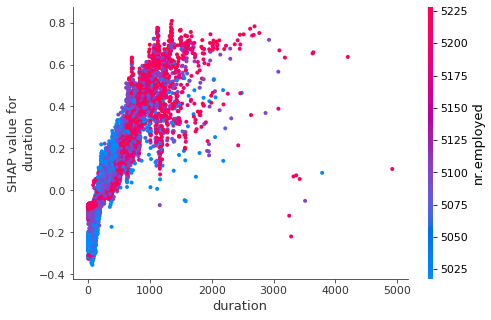

In [19]:
## 3개 인자 필요,  관심있는 변수, shap_values, data값들 
shap.dependence_plot('duration', shap_values, data[input_var])

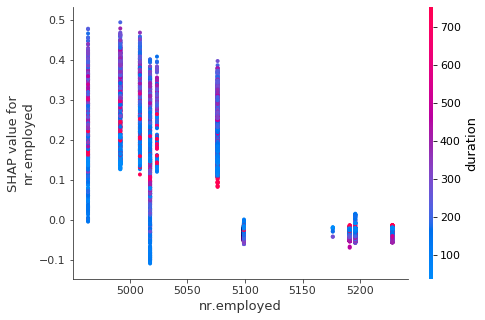

In [20]:
shap.dependence_plot('nr.employed', shap_values, data[input_var])

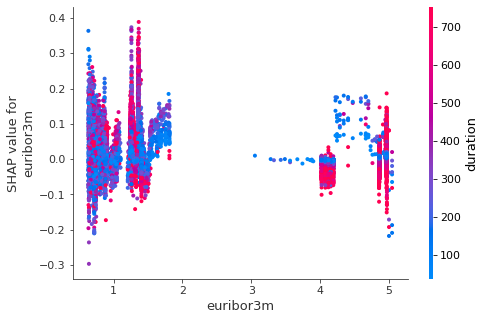

In [21]:
shap.dependence_plot('euribor3m', shap_values, data[input_var])
##이런식으로 주요변수를 확인할 수 있음

## Force plot

In [22]:
prediction=xgb.predict(data[input_var])

In [23]:
data['pred'] = prediction

In [24]:
data['pred']

0        0.000357
1       -0.001140
2        0.000747
3       -0.000208
4        0.002844
           ...   
41183    0.882677
41184    0.342715
41185    0.092818
41186    0.964269
41187    0.093736
Name: pred, Length: 41188, dtype: float32

In [ ]:
## 왜 첫번째 행이 0이라고 예측했느냐...  이런게 궁금할 수 있잖아

In [25]:
shap.initjs()
## java-script를 이용하기 때문에 미리 뿌려놔야함
## 41183행의 사람이 왜 88.2677프로 확률로 yes로 판단했는지 알고싶어 그러면
shap.force_plot(explainer.expected_value, shap_values[41183], data[input_var].iloc[41183])